**End-to-end Machine Learning project**

In [ ]:

# Since we are going to use various libraries for calculations, we need to import them.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model



In [ ]:
# Read the CSV file and check the first five rows of our dataset. In this case, we are using a vehicle model dataset 
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


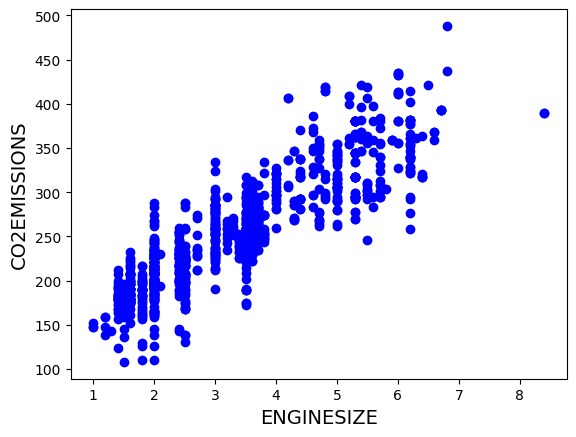

In [ ]:
# Our goal is to predict the value of “co2 emissions” from the value of “engine size” in our dataset. 
# Select the features we want to consider in predicting values.
# We can visualize our data on a scatter plot.

data = data[["ENGINESIZE","CO2EMISSIONS"]]

# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data["ENGINESIZE"] , data["CO2EMISSIONS"] , color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [ ]:
# Divide the data into training and testing data.
# To check the accuracy of a model, we are going to divide our data into training and testing datasets. 
# We will use training data to train our model, and then we will check the accuracy of our model using the testing dataset.
# Generating training and testing data from our data.
# We are using 80% data for training.

train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]


In [ ]:
# Training our model
# Here is how we can train our model and find the coefficients for our best-fit regression line.

# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)

# The coefficients:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept


coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


Text(0, 0.5, 'Emission')

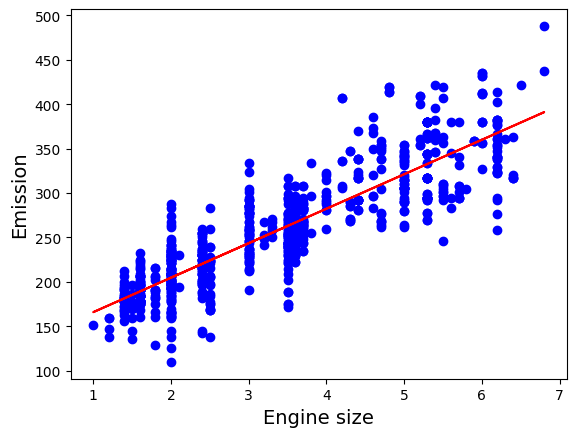

In [ ]:
# Plot the best fit line.
# Based on the coefficients, we can plot the best fit line for our dataset.

# Plotting the regression line:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [ ]:
# Prediction function.
# We are going to use a prediction function for our testing dataset.
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values


In [ ]:
# Predicting co2 emissions for future car.
# Predicting the values of co2 emissions based on the regression line.

my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission :",estimatd_emission)

Estimated Emission : 262.9528329350173


In [ ]:
# Checking accuracy for test data.
# We can check the accuracy of a model by comparing the actual values with the predicted values in our dataset.

from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71
